# Comparación de Clusters
**Christian Berdejo Sánchez**

## import Dataset

In [1]:
import pandas as pd
df = pd.read_csv('./datasets/Mall_Customers.csv', header='infer')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


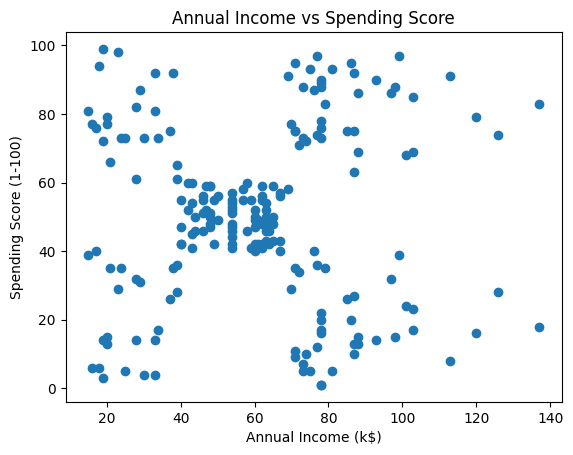

In [2]:
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()



Asi de forma visual parece que vamos a poder separar en 5 clusters

## K means

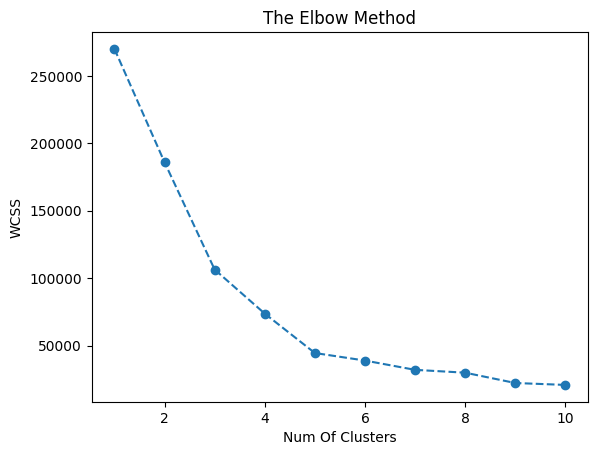

In [3]:
from sklearn.cluster import KMeans

#Método del Codo podemos obtener el nº de clusters
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)
   
plt.plot(range(1,11),WCSS, marker='o',linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

Por el método del codo parece ser que el nº de clusters es 5. Además si nos fijamos en los puntos ploteados se puede observar 5 grupos principales.

 Se procede a realizar el clustering con Kmeans.

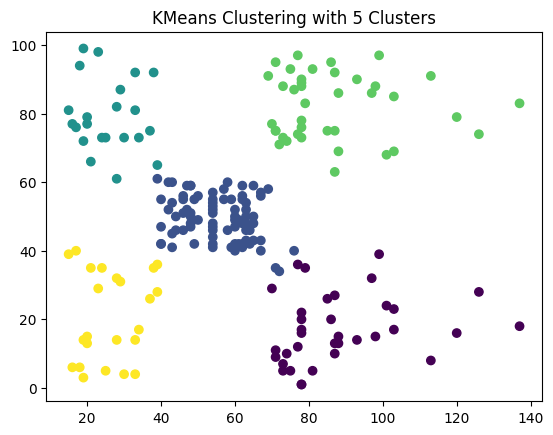

In [4]:
clusterer = KMeans(n_clusters=5, random_state=10)
y_mean = clusterer.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_mean, cmap='viridis')

plt.title('KMeans Clustering with 5 Clusters')
plt.show()

Sale bastante bien con el K-means

Así obtenemos el silhoutte Score

In [5]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(X, y_mean)}')

Silhouette Score(n=5): 0.553931997444648


Podríamos comparar visualizar el silhouette score para cada nº de clusters y ver cual es el mejor.


For n_clusters = 2 The average silhouette_score is : 0.3774913479961559
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4937945814354117
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 8 The average silhouette_score is : 0.4545701047772879
For n_clusters = 10 The average silhouette_score is : 0.4378619689153556


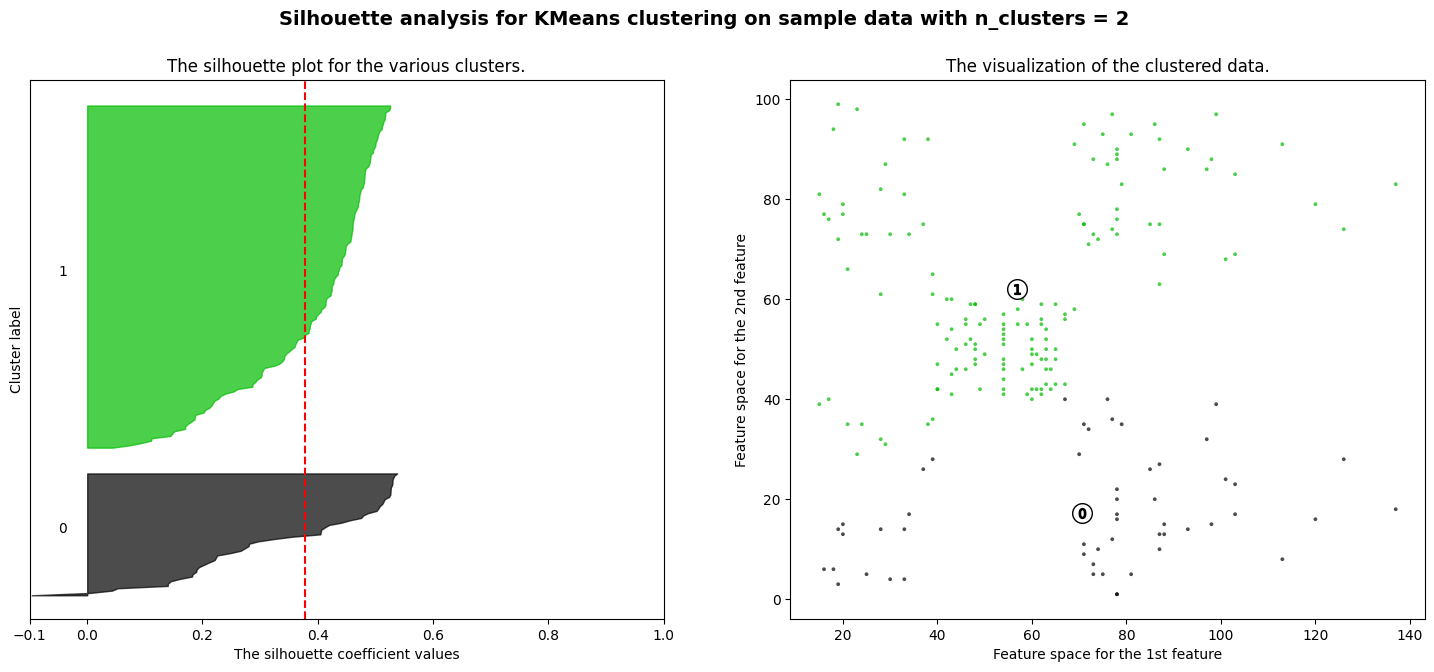

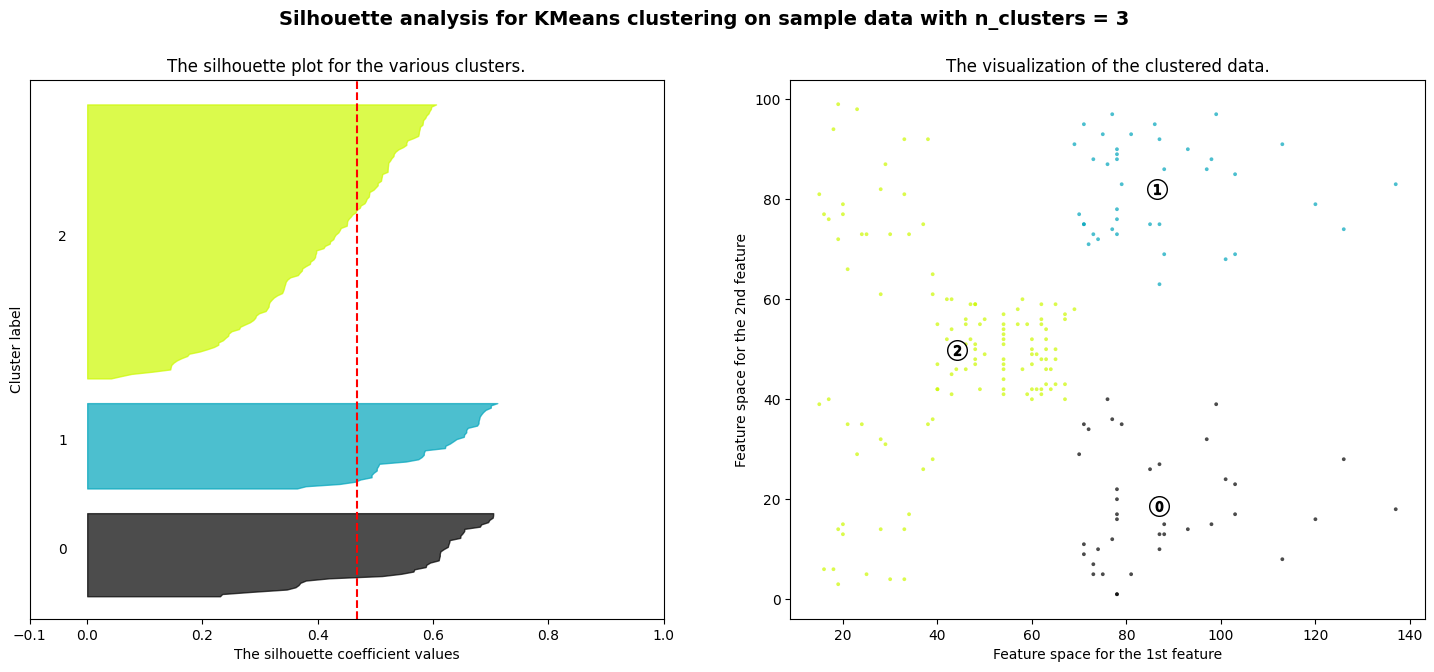

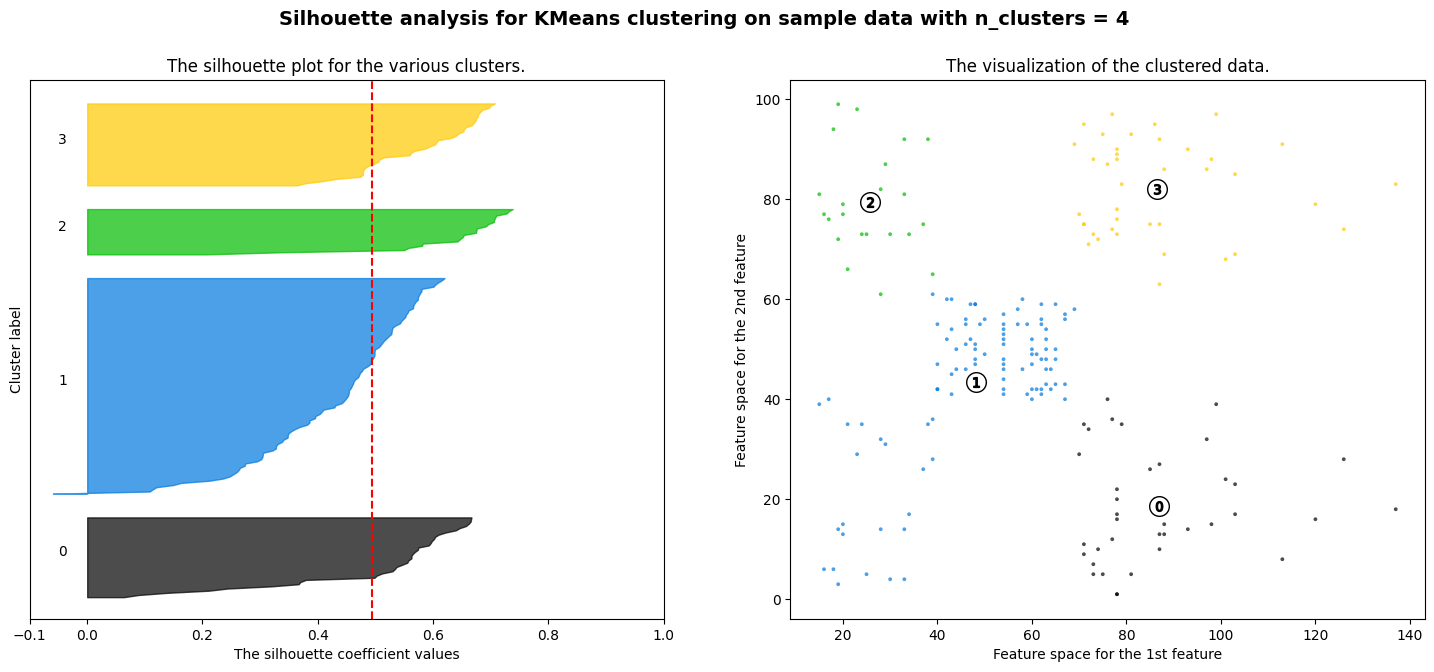

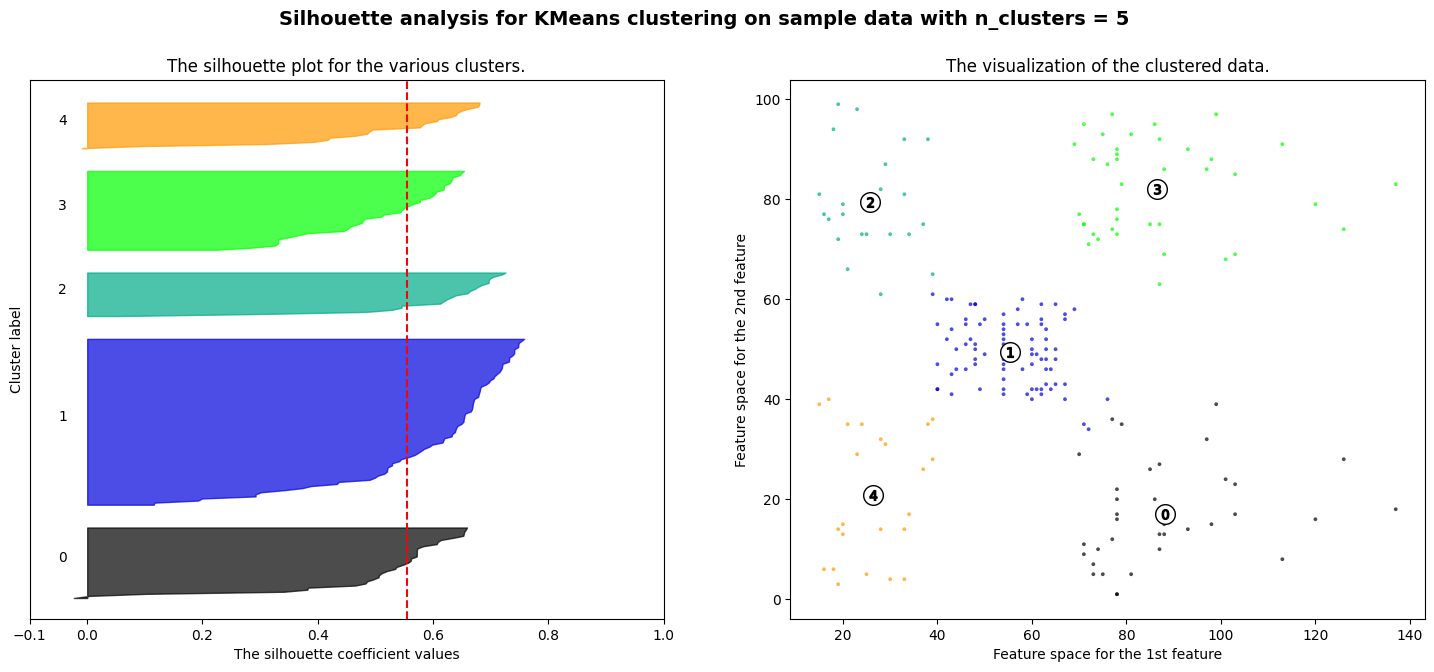

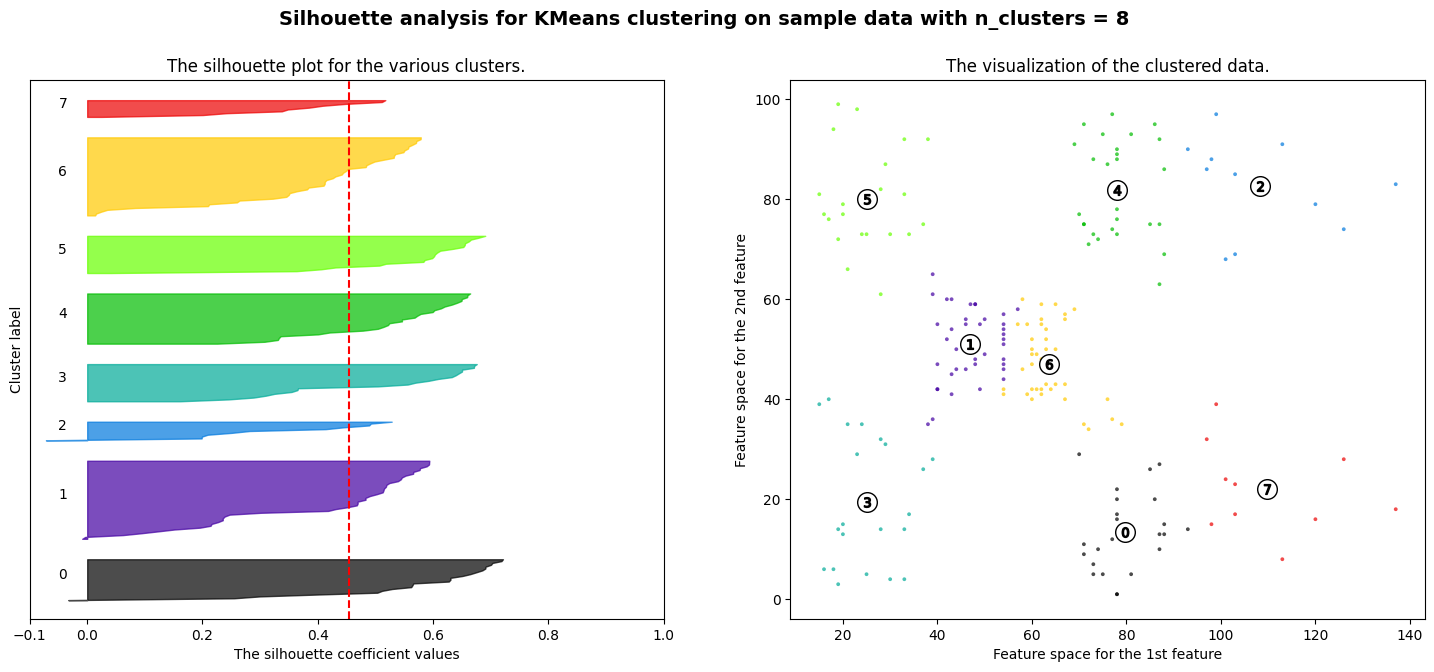

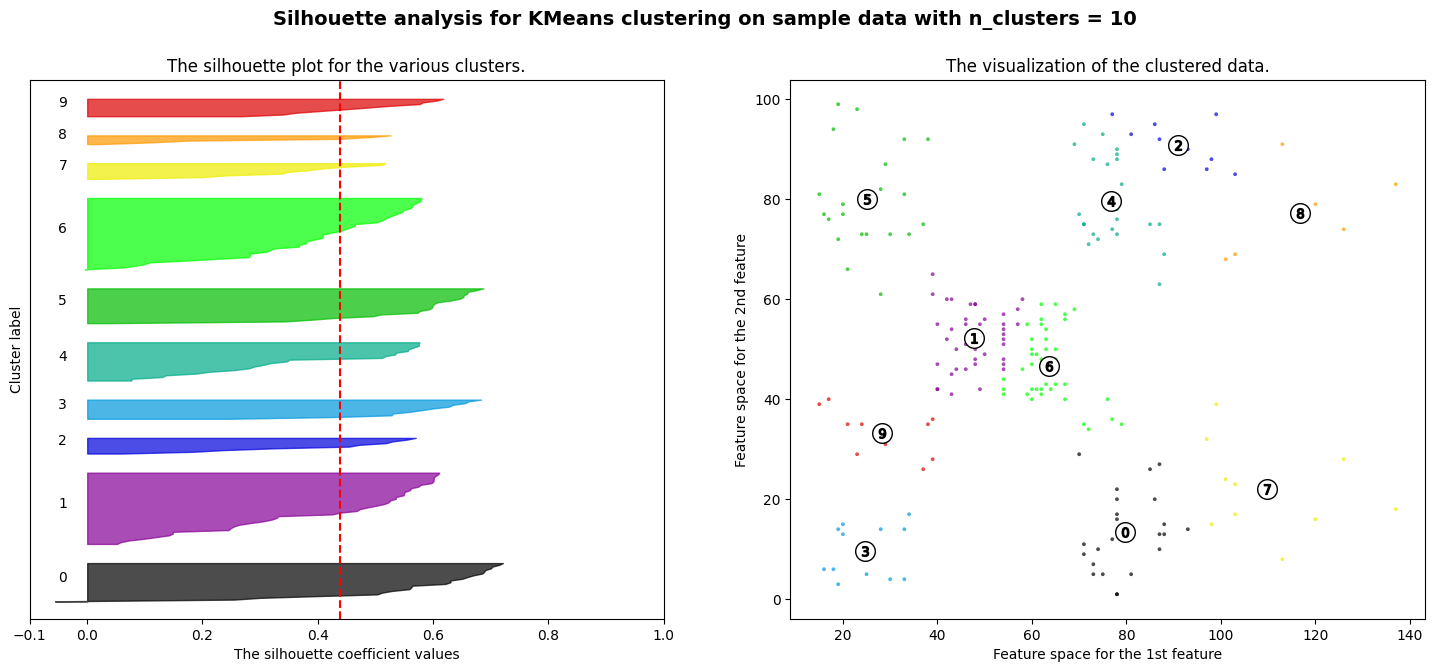

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = [2, 3, 4, 5 ,8,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Se confirma que 5 es el número de clusters óptimo. Para K means 

## DBSCAN

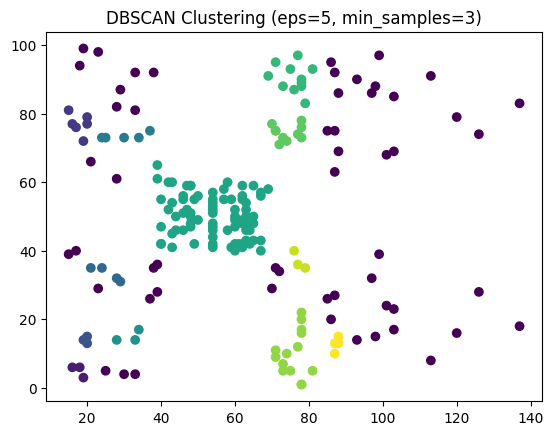

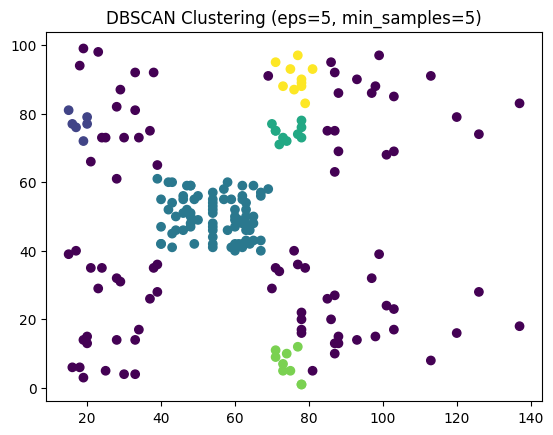

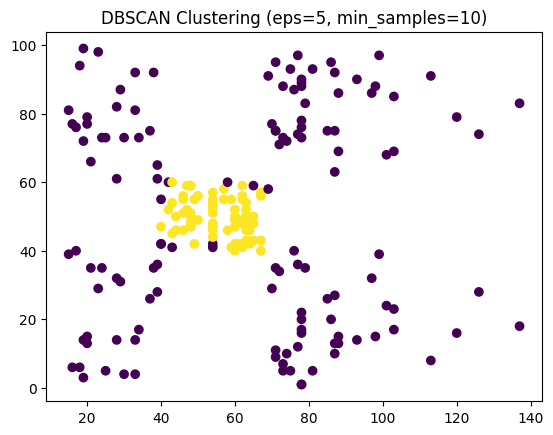

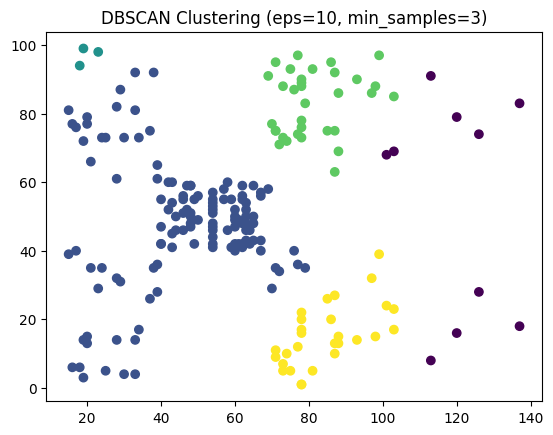

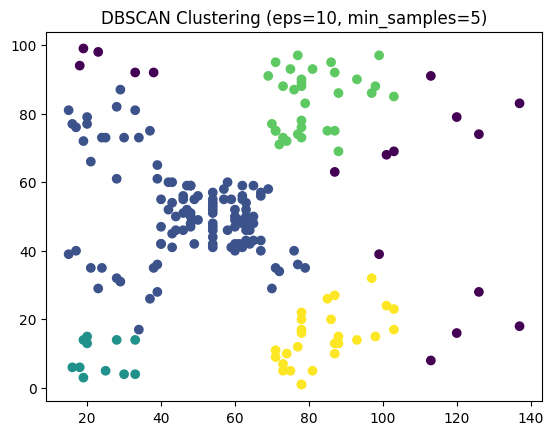

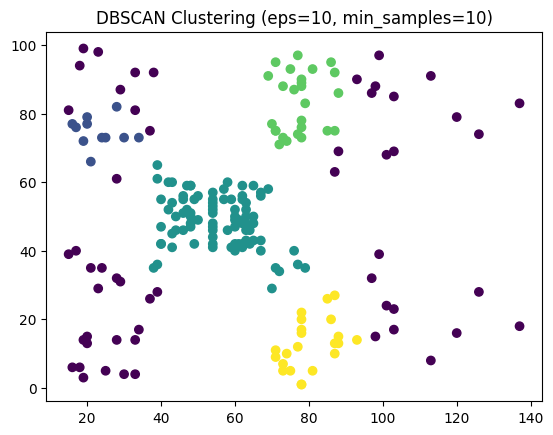

In [7]:
from sklearn.cluster import DBSCAN

param_grid = {
    'eps': [5,10],
    'min_samples': [3, 5, 10]
}
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        
        # Plotting the results
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
       
        plt.show()




Parece ser que DBSCAN no es el mejor método de clustering con este dataset, parece seer que el que mejor funciona de DBSCAN es con eps = 10 y min_samples 10, aún así tampoco parece ser tan bueno como Kmeans para clasificar.

## Agglomerative Clustering

Linkage: ward


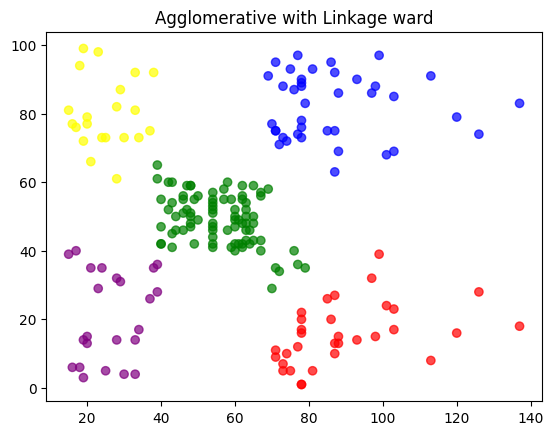

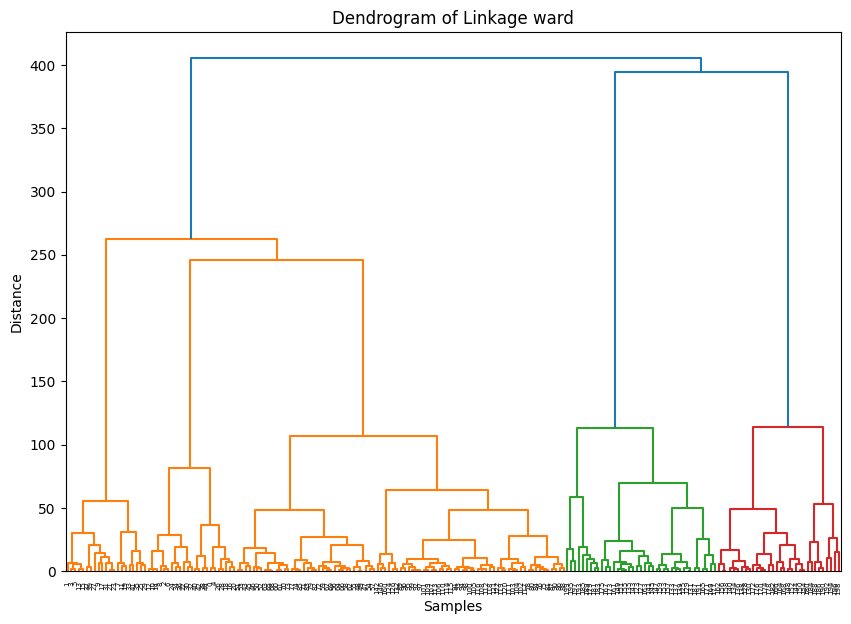

Linkage: single


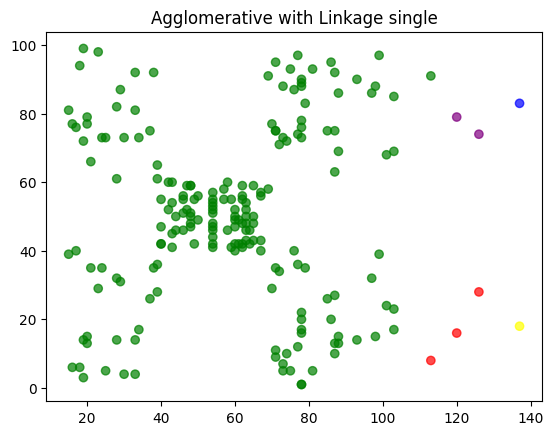

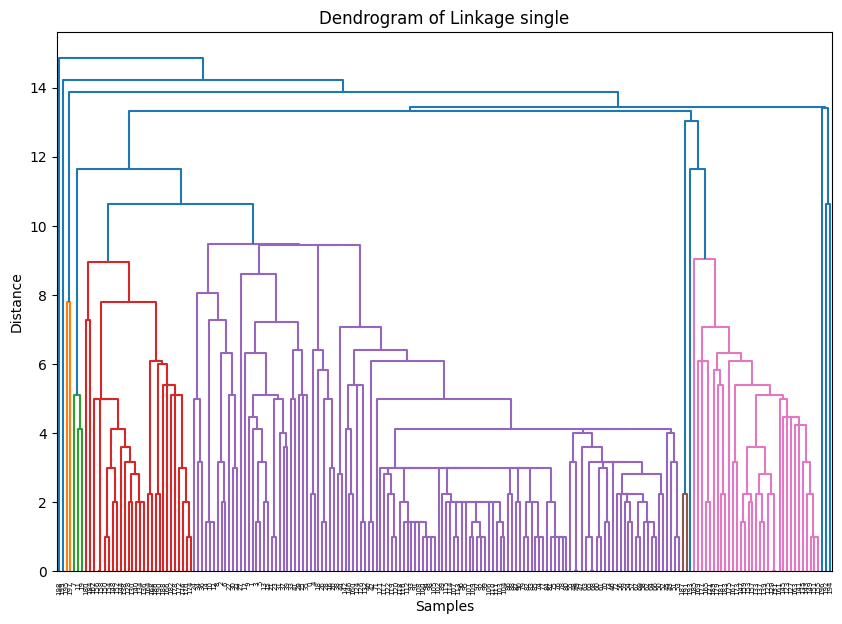

Linkage: complete


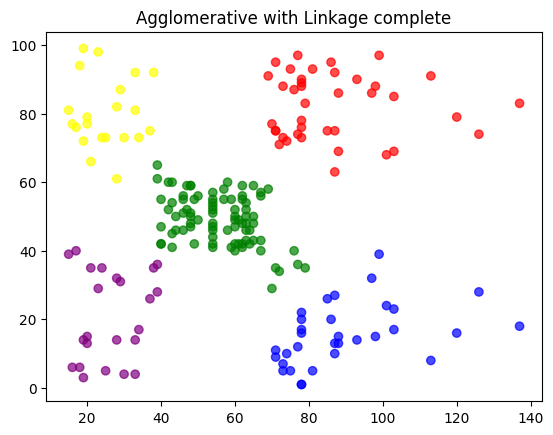

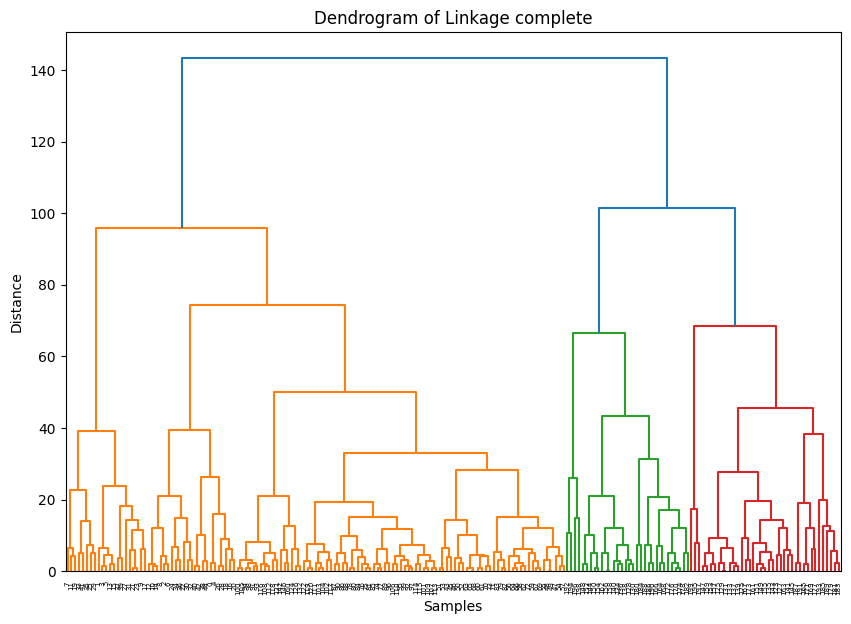

Linkage: average


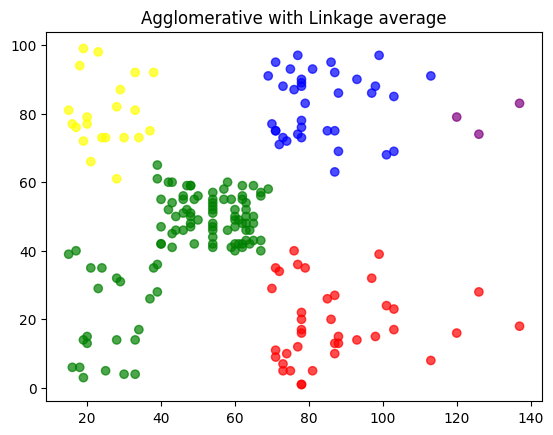

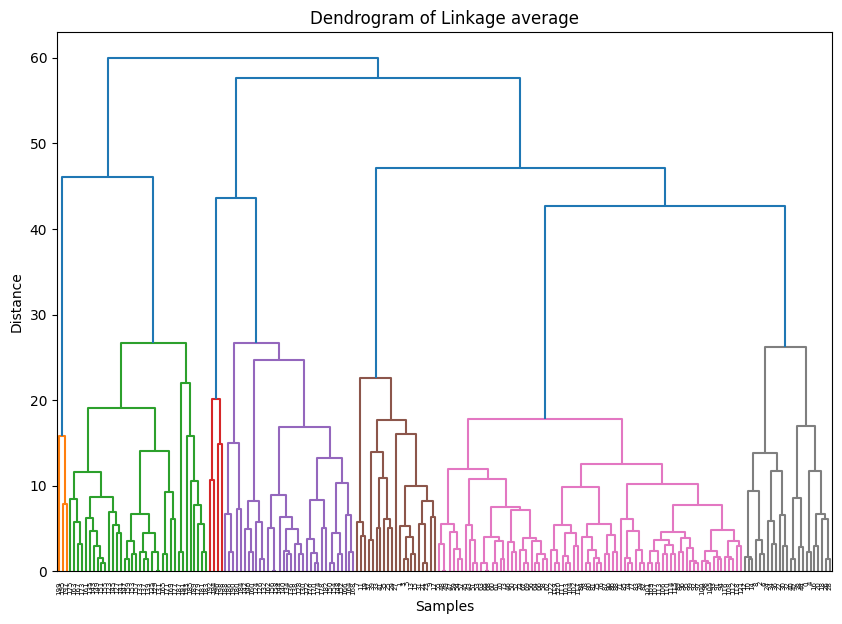

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkages = ['ward', 'single', 'complete', 'average']

for link in linkages:
    agglo = AgglomerativeClustering(n_clusters=5, linkage=link)
    agglo.fit(X)
    myColors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple',} 

    print(f"Linkage: {link}")

    plt.scatter(X[:, 0], X[:, 1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)   
    plt.title(f'Agglomerative with Linkage {link}')
    plt.show()

    # Generate the linkage matrix
    Z = linkage(X, link)

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram of Linkage {link}')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


En este caso parece que los que mejor resultado son agglomerative clustering con 5 clusters con linkae ward o complete.

## Conclusiones

Parece que para descriminar los clusters correctamente en este caso podríamos utilizar Kmeans o Agglomerative Clustering(ward or complete) con 5 clusters.